# E-commerce Dataset 2020
For this project, we want to enhance the webpage with the provided dataset of e-Commerce dataset in February and April by taking in consideration COVID-19 pandemic.

#### Goal: 
Our goal is analyzing customer online purchasing behavior during pre covid-19 and post covid-19 using February and April dataset, respectively. Which allows us to understand the traffic of the website and conversion made by consumers to potential solve E-commerce’s dataset problems, and expand the opportunities for marketing campaigns, target promotions and optimizing the inventory level.

#### Team: 
Tatiana Yung Wu, Yichi Zhang, Chenzhi Pan, Yixuan Wang, Ying Wu.

#### Dataset link: 
https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

#### Dataset structure: 
`event_time`: Time when event happened at (in UTC) 

`event_type`: 

* view - a user viewed a product 

* cart - a user added a product to shopping cart 

* remove from cart - a user removed a product from shopping cart 

* purchase - a user purchased a product 


`product_id`: ID of a product 

`category_id`: Product's category ID 

`category_code`: Product's category taxonomy (code name) 

`brand`: Downcased string of brand name. 

`price`: Float price of a product. Present. 

`user_id`: Permanent user ID. 

`user_session`: Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

# Imports

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
apr = pd.read_csv('2020-Apr.csv.gz',compression='gzip',error_bad_lines=False)
feb = pd.read_csv('Feb20.csv',error_bad_lines=False)

b'Skipping line 19039425: expected 9 fields, saw 17\n'
b'Skipping line 48781652: expected 9 fields, saw 10\n'
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preprocessing

---



> First we check the summary of both dataframes


In [9]:
print('This is the summary of February Dataframe')
print(feb.info())

This is the summary of February Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55386711 entries, 0 to 55386710
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     object 
 3   category_id    object 
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        object 
 8   user_session   object 
dtypes: float64(1), object(8)
memory usage: 3.7+ GB
None


In [10]:
print('This is the summary of April Dataframe')
print(apr.info())

This is the summary of April Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66589268 entries, 0 to 66589267
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB
None


> After viewing the dataframe summary, we cleaned some data by changing the type of `'event_type'` and `'category_code'` into `'category'`, and upgrade `'event_time'` to datetime object series, as well as, we dropped the missing data.


In [3]:
feb['event_time']=pd.to_datetime(feb['event_time'],errors='coerce')
feb['event_type']=feb['event_type'].astype('category')
feb['category_code']=feb['category_code'].astype('category')
feb.drop(columns=['category_id'],inplace=True)
feb.dropna(subset=['event_time','product_id','category_code', 'brand', 'price','user_id','user_session'],inplace=True)

apr['event_time']=pd.to_datetime(apr['event_time']).dt.tz_convert(None)
apr['event_type']=apr['event_type'].astype('category')
apr['category_code']=apr['category_code'].astype('category')
apr.drop(columns=['category_id'],inplace=True)
apr.dropna(subset=['category_code','brand','user_session'],inplace=True)

# Exploratory Analysis

---



### **What is the difference between the total sales from Top 10 percent of consumers and regular consumers?**

**Results**: Top 10% of consumers with the highest turnover, also known as our valuable customers, tend to spend on average 2699.31 while the 90% of consumers(regular customers) would be spend on average of 285.96. Taking into account, the 10% of the most valuable customers counts as almost 50% of the total sales (224,418,785) during post-covid, and similarly happens during pre-covid as it is shown below. This means that in order to mantain loyalty from our valuable customers, we must have to create better marketing campaigns to keep them on board, and for regular customer by creating a enjoyable journey experience on the website since their is evidence of low number of returnings.

> First, we filter the activity sales for customers who had purchased from the website, and group them by `user_id` and sum the total price of each of them.

In [6]:
purchase_filter = apr['event_type']=='purchase'
Customer_table = apr.loc[purchase_filter].groupby(by=['user_id']).agg(number_of_purchases=('user_id','count'),
total_sales = ('price','sum')).reset_index()

>Then, for most valuable customers we had to filter the top 10% purchase amount and the calculate their descriptive statistics to be able to compare to regular consumers.

**Comparation between top 10 and regular customers**

In [7]:
top10_sales = np.percentile(Customer_table['total_sales'], 90)
top10_sales_filter = Customer_table['total_sales'] >= top10_sales
top10_customers_with_hightest_turnover = Customer_table.loc[top10_sales_filter]

print('Post-covid')
print((' ')*60)
print('Top 10% customers Purchase Amount-Descriptive Statistics')
print(' '*60)
print(top10_customers_with_hightest_turnover['total_sales'].describe())
print(' '*60)
total_sales_amount = Customer_table['total_sales'].sum()
print('Total sales: {:,.0f}'.format(total_sales_amount))
total_sales_amount_top10perc = top10_customers_with_hightest_turnover['total_sales'].sum()
total_percent_top10perc = (total_sales_amount_top10perc/total_sales_amount)*100
print('Total sales of top 10% customers: {:,.0f} ({}%)'.format(total_sales_amount_top10perc, round(total_percent_top10perc,1)))

print('-'*60)

purchase_filter = apr['event_type']=='purchase'
regular_customers = Customer_table.loc[~top10_sales_filter]

"""Regular customer's descriptive statistics"""

print('Regular customers Purchase Amount-Descriptive Statistics')
print(' '*60)
print(regular_customers['total_sales'].describe())
print(' '*60)
total_sales_amount_regular_customers=regular_customers['total_sales'].sum()
total_percent_regular_customers = (total_sales_amount_regular_customers/total_sales_amount)*100
print('Total sales of regular customers: {:,.0f} ({}%)'.format(total_sales_amount_regular_customers, round(total_percent_regular_customers,1)))

APRIL
                                                            
Top 10% customers Purchase Amount-Descriptive Statistics
                                                            
count     42561.000000
mean       2699.308716
std        3435.731430
min        1139.420000
25%        1388.970000
50%        1798.240000
75%        2773.310000
max      122503.340000
Name: total_sales, dtype: float64
                                                            
Total sales: 224,418,785
Total sales of top 10% customers: 114,885,278 (51.2%)
------------------------------------------------------------
Regular customers Purchase Amount-Descriptive Statistics
                                                            
count    383042.000000
mean        285.956911
std         263.272001
min           0.420000
25%          84.920000
50%         198.640000
75%         404.620000
max        1139.390000
Name: total_sales, dtype: float64
                                                            

In [6]:
"""feb"""
purchase_filter = feb['event_type']=='purchase'
Customer_table = feb.loc[purchase_filter].groupby(by=['user_id']).agg(number_of_purchases=('user_id','count'),
total_sales = ('price','sum')).reset_index()

top10_sales = np.percentile(Customer_table['total_sales'], 90)
top10_sales_filter = Customer_table['total_sales'] >= top10_sales
top10_customers_with_hightest_turnover = Customer_table.loc[top10_sales_filter]

print('February')
print((' ')*60)
print('Top 10% customers Purchase Amount-Descriptive Statistics')
print(' '*60)
print(top10_customers_with_hightest_turnover['total_sales'].describe())
print(' '*60)
total_sales_amount = Customer_table['total_sales'].sum()
print('Total sales: {:,.0f}'.format(total_sales_amount))
total_sales_amount_top10perc = top10_customers_with_hightest_turnover['total_sales'].sum()
total_percent_top10perc = (total_sales_amount_top10perc/total_sales_amount)*100
print('Total sales of top 10% customers: {:,.0f} ({}%)'.format(total_sales_amount_top10perc, round(total_percent_top10perc,1)))

print('-'*60)

purchase_filter = feb['event_type']=='purchase'
regular_customers = Customer_table.loc[~top10_sales_filter]

"""Regular customer's descriptive statistics"""

print('Regular customers Purchase Amount-Descriptive Statistics')
print(' '*60)
print(regular_customers['total_sales'].describe())
print(' '*60)
total_sales_amount_regular_customers=regular_customers['total_sales'].sum()
total_percent_regular_customers = (total_sales_amount_regular_customers/total_sales_amount)*100
print('Total sales of regular customers: {:,.0f} ({}%)'.format(total_sales_amount_regular_customers, round(total_percent_regular_customers,1)))

February
                                                            
Top 10% customers Purchase Amount-Descriptive Statistics
                                                            
count     39344.000000
mean       5536.424149
std        7943.561210
min        2082.920000
25%        2599.512500
50%        3467.965000
75%        5606.437500
max      302725.800000
Name: total_sales, dtype: float64
                                                            
Total sales: 381,510,013
Total sales of top 10% customers: 217,825,072 (57.1%)
------------------------------------------------------------
Regular customers Purchase Amount-Descriptive Statistics
                                                            
count    354089.000000
mean        462.270620
std         469.600425
min           0.770000
25%         124.370000
50%         287.480000
75%         660.340000
max        2082.900000
Name: total_sales, dtype: float64
                                                         

### **Based on the 10 percent of customers among all the clients from the e-commerce webpage, what is the average of their spendings and the average of purchased time for the month of February and April?**

**Result:** In the month of February and April, the most valuable customers with the highest turnover, are more likely to spend on average 5,536.42 and 2,699.31, respectively on average of 5 to 11 times, while the other 90% of customers, known as 'regular customers' spend on average 462.27 and 285.96 respectively on average of 1-2 times purchases.

In [7]:
sorted_10percent_customer = top10_customers_with_hightest_turnover.sort_values('total_sales', ascending=False)
print('FEBRUARY')
print((' ')*60)
print('Top 10% customers')
print(sorted_10percent_customer.head(10))
print(('-')*60)
print('The average is:')
print(round(sorted_10percent_customer[['number_of_purchases', 'total_sales']].mean(),2))
print((' ')*60)
sorted_regular_customers = regular_customers.sort_values('total_sales', ascending=False)

print('Regular customers')
print(sorted_regular_customers.head(10))
print(('-')*60)
print('The average is:')
print(round(sorted_regular_customers[['number_of_purchases', 'total_sales']].mean(),2))

FEBRUARY
                                                            
Top 10% customers
          user_id  number_of_purchases  total_sales
182562  563051763                  264    302725.80
321987  610871788                  159    292203.44
100392  529168923                  312    277318.26
269672  598224683                  425    247693.96
198285  569374504                  264    235510.52
83221   522482125                  161    219680.10
248815  590847617                  156    213193.63
344905  613954635                  428    206129.92
149060  549109608                  343    182246.88
128577  541733121                  138    179060.22
------------------------------------------------------------
The average is:
number_of_purchases      11.56
total_sales            5536.42
dtype: float64
                                                            
Regular customers
          user_id  number_of_purchases  total_sales
189648  566283686                    2      2082.90
476

In [8]:
sorted_10percent_customer = top10_customers_with_hightest_turnover.sort_values('total_sales', ascending=False)
print('APRIL')
print((' ')*60)
print('Top 10% customers')
print(sorted_10percent_customer.head(10))
print(('-')*60)
print('The average is:')
print(round(sorted_10percent_customer[['number_of_purchases', 'total_sales']].mean(),2))
print((' ')*60)
sorted_regular_customers = regular_customers.sort_values('total_sales', ascending=False)

print('Regular customers')
print(sorted_regular_customers.head(10))
print(('-')*60)
print('The average is:')
print(round(sorted_regular_customers[['number_of_purchases', 'total_sales']].mean(),2))

APRIL
                                                            
Top 10% customers
          user_id  number_of_purchases  total_sales
138597  553446649                  178    122503.34
163088  566213018                  120    119393.24
53544   518514888                   86    114484.63
288066  628167977                  448    112389.61
69470   522016074                  129    103291.35
129048  548782814                  108    100853.54
309844  635021608                   76     98535.34
142616  555546931                   63     97280.42
291696  629426279                  149     91844.44
287609  627964145                  196     81366.71
------------------------------------------------------------
The average is:
number_of_purchases       5.39
total_sales            2699.31
dtype: float64
                                                            
Regular customers
          user_id  number_of_purchases  total_sales
149690  559349881                    2      1139.39
263578

### **Who are the top 10 users that had spend the most on the webpage?**

**Result:** Through this process we were able to udientify valuable consumers for both months which would be helpful target correctly with higher promotions and discounts to mantain their loyalty to the website.

<AxesSubplot:title={'center':'Top 10 customers for April'}, xlabel='user_id', ylabel='Amount Spent'>

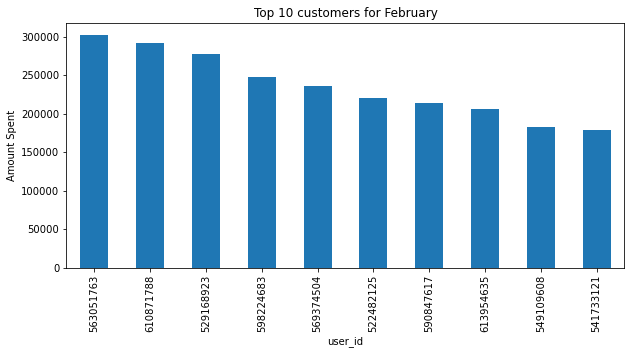

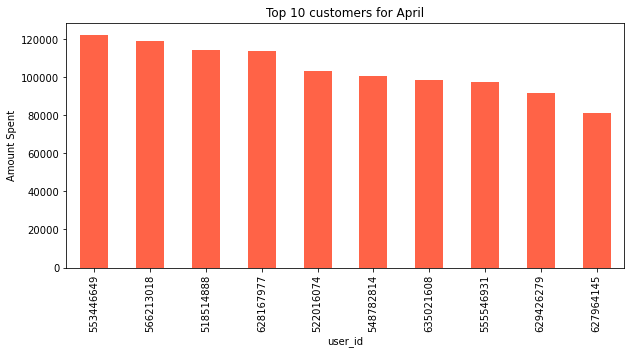

In [8]:
"""Top 10 consumers for February"""
purchase_filter = feb['event_type']=='purchase'
consumer_spending = feb.loc[purchase_filter].groupby(by=['user_id']).agg({'price':'sum'})
consumers = consumer_spending['price'].sort_values(ascending=False)
top_10_consumers = consumer_spending['price'].sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 4.5))

plt.title('Top 10 customers for February')
plt.xlabel('Users ID')
plt.ylabel('Amount Spent')
top_10_consumers.plot(kind= 'bar')


"""Top 10 consumers for april"""
purchase_filter = apr['event_type']=='purchase'
consumer_spending = apr.loc[purchase_filter].groupby(by=['user_id']).agg({'price':'sum'})
consumers = consumer_spending['price'].sort_values(ascending=False)
top_10_consumers = consumer_spending['price'].sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 4.5))

plt.title('Top 10 customers for April')
plt.xlabel('Users ID')
plt.ylabel('Amount Spent')
top_10_consumers.plot(kind= 'bar', color='tomato')

### **K-means**
Here we use the *K*-means clustering algorithm, used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. The purpose of using *K*-mean is to identify two segments: 'valuable customer' and 'regular customer'. 

(Note: the result is not the same as the preview analysis, the preview analysis was manual, while this one is automatically.)

In [4]:
feb['user_id'] = feb['user_id'].astype('category')
apr['user_id'] = apr['user_id'].astype('category')

In [6]:
# create new numerical variables
feb_table = feb.loc[feb['event_type']=='purchase'].groupby('user_id').agg(feb_total_spending=('price','sum')).reset_index()
apr_table = apr.loc[apr['event_type']=='purchase'].groupby('user_id').agg(apr_total_spending=('price','sum')).reset_index()
feb_return = feb.loc[feb['event_type']=='purchase'].groupby('user_id').agg(feb_return_time=('user_session','count')).reset_index()
apr_return = apr.loc[apr['event_type']=='purchase'].groupby('user_id').agg(apr_return_time=('user_session','count')).reset_index()

february = feb_table.merge(feb_return, on='user_id')
april = apr_table.merge(apr_return, on='user_id')

In [17]:
february = february[february['feb_total_spending'] != 0]
april = april[april['apr_total_spending'] != 0]
february['feb_spend_per_visit'] = february['feb_total_spending'] / february['feb_return_time']
april['apr_spend_per_visit'] = april['apr_total_spending'] / april['apr_return_time']
february = february[february['feb_total_spending'] >= february['feb_spend_per_visit']]
april = april[april['apr_total_spending'] >= april['apr_spend_per_visit']]

In [19]:
february.sort_values('feb_spend_per_visit', ascending=False).head()

,user_id,feb_total_spending,feb_return_time,feb_spend_per_visit
1545226,566446465,5148.08,2,2574.04
528513,520619795,5148.08,2,2574.04
1536825,566033550,5148.08,2,2574.04
2505672,606615364,5148.08,2,2574.04
1185137,549204747,5148.08,2,2574.04


In [20]:
april.sort_values('apr_spend_per_visit', ascending=False).head()

,user_id,apr_total_spending,apr_return_time,apr_spend_per_visit
1546075,586024714,5148.14,2,2574.07
324229,517466874,10296.16,4,2574.04
233611,515554191,5148.08,2,2574.04
1289149,568518150,7722.12,3,2574.04
2009804,612913101,5147.62,2,2573.81


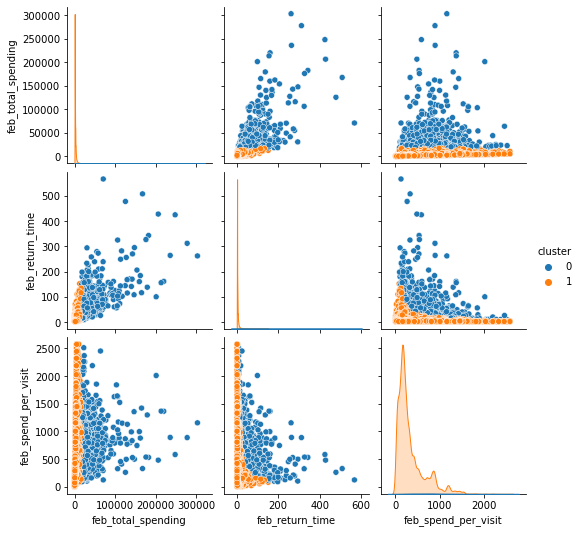

In [21]:
X_feb = february.drop('user_id', axis=1)
X_apr = april.drop('user_id', axis=1)
# Feburary Kmean
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, 
                random_state=780)
kmeans.fit(X_feb)                 
y_kmeans = kmeans.predict(X_feb) 
february['cluster'] = y_kmeans

sns.pairplot(data=february, hue='cluster')

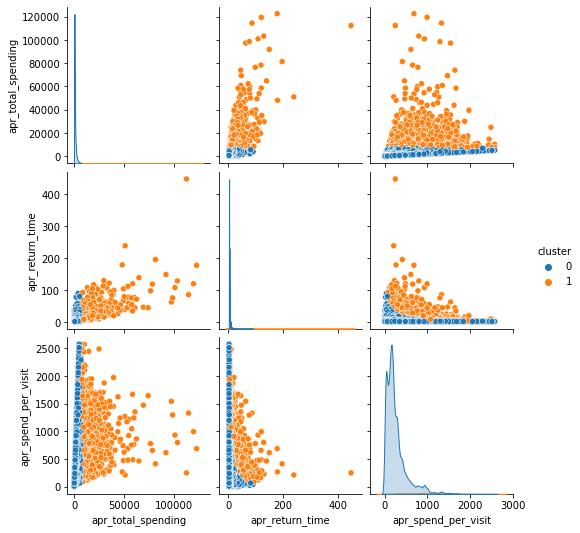

In [22]:
# April Kmean
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=780)
                
kmeans.fit(X_apr)                 
y_kmeans = kmeans.predict(X_apr)
april['cluster'] = y_kmeans

sns.pairplot(data=april, hue='cluster')

### **What are the top brands that were purchased by consumers?**
**Results:** The top brands are more likely to be world’s large producers of electronic devices such as Samsung, Apple, Xiaomi. Same for the month of April, the top brands maintain their ranking position amount their competitors. Another observation, even to the drastic drop on sales for Apple brand, it strongly maintains the second place.

In [10]:
"""Feb"""
purchase_feb=feb[feb['event_type']=='purchase']
brands_feb=purchase_feb.groupby(feb['brand']).size()
top10_brands_feb=brands_feb.sort_values(ascending=False)[:10]

"""April"""
purchase_apr=apr[apr['event_type']=='purchase']
brands_apr=purchase_apr.groupby(apr['brand']).size()
top10_brands_apr=brands_apr.sort_values(ascending=False)[:10]
#check
pd.concat([top10_brands_feb,top10_brands_apr], axis=1, keys=['top10_brands_feb','top10_brands_apr'])

,top10_brands_feb,top10_brands_apr
samsung,272577.0,220113.0
apple,269192.0,97694.0
xiaomi,108081.0,63046.0
huawei,41196.0,30754.0
lucente,22642.0,NaN
oppo,18646.0,24498.0
lg,13087.0,17600.0
acer,12166.0,12529.0
sony,11112.0,11238.0
artel,7780.0,NaN


Text(0.5, 1.0, 'April')

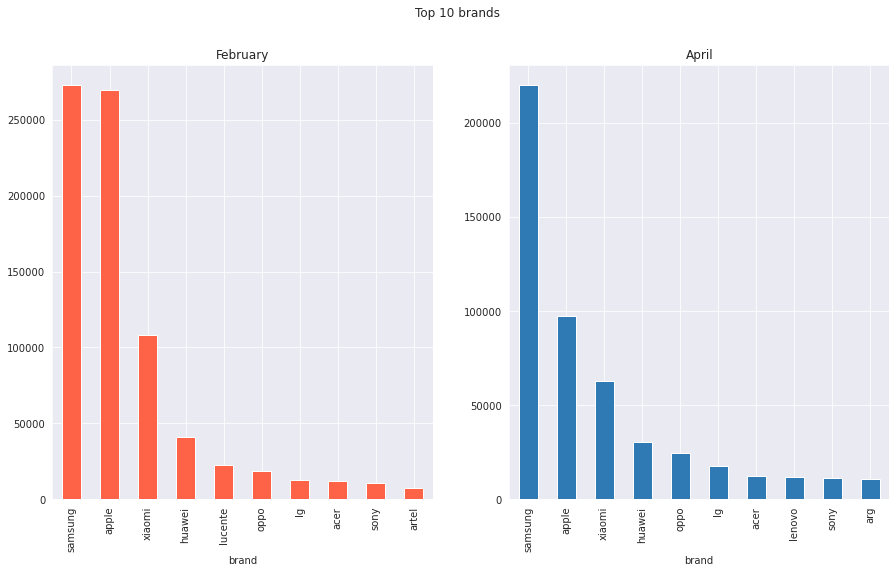

In [24]:
plt.gcf().set_size_inches(15, 8)

plt.subplot(1,2,1)
plt.suptitle('Top 10 brands')

top10_brands_feb.plot(kind='bar', color='tomato')
plt.title('February')

plt.subplot(1,2,2)
top10_brands_apr.plot(kind='bar')
plt.title('April')

### **What categories were most purchased among the others?**

**Result:** For both months 'Construction' category is way more popular compared to other categories, this category include smartphones and other electronic devices.

Text(0.5, 1.0, 'April Top Categories')

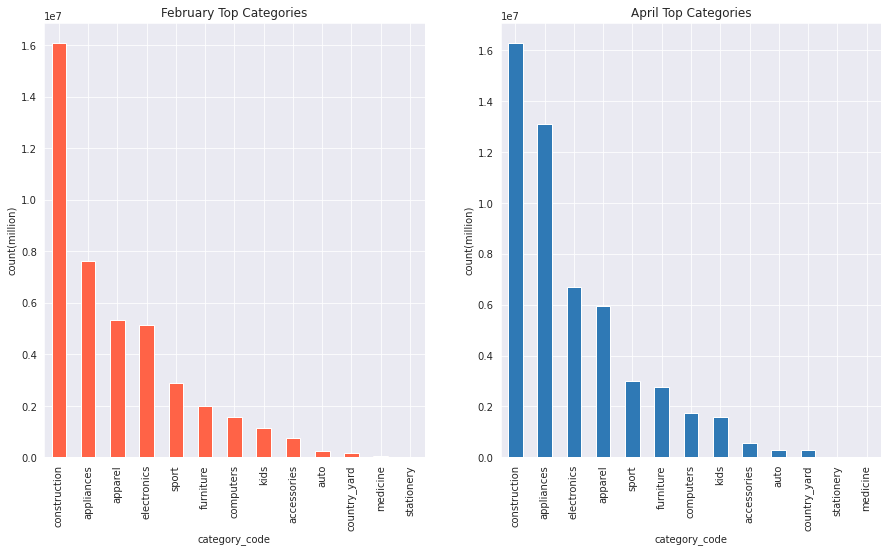

In [25]:
plt.gcf().set_size_inches(15, 8)

"""February"""
feb_combine_category = feb.copy()
feb_combine_category['category_code'] = feb['category_code'].str.split('.').str[0]
category_rank_feb = feb_combine_category.groupby(['category_code']).size().sort_values(ascending=False)

plt.subplot(1,2,1)
category_rank_feb.plot(kind='bar', color='tomato')
plt.ylabel('count(million)')
plt.title('February Top Categories')


"""April"""
apr_combine_category = apr.copy()
apr_combine_category['category_code'] = apr['category_code'].str.split('.').str[0]
category_rank = apr_combine_category.groupby(['category_code']).size().sort_values(ascending=False)

plt.subplot(1,2,2)
category_rank.plot(kind='bar')
plt.ylabel('count(million)')
plt.title('April Top Categories')

### **Conversion Rate**
In electronic commerce, conversion marketing is marketing with the intention of increasing conversions--that is, site visitors who are paying customers.The conversion rate is the percentage of users who take a desired action. In a simple formula, \begin{equation*} Conversion \ rate =  \frac{Count \ of \ purchase(purchase)}{Total \ count \ of \ action(purchase+cart+view)} \end{equation*} 

During the pandemic, people had no choice but to stay at home. As a result, they cooked more leading to more kitchen supplies purchases. Since barbershops were closed this lead higher conversion on “hair_cutter”. In addition, due to the covid, people chose to ride bicycles rather than taking public transportation to avoid catching viruses.

### High conversion rate

Text(0, 0.5, 'conversion_rate')

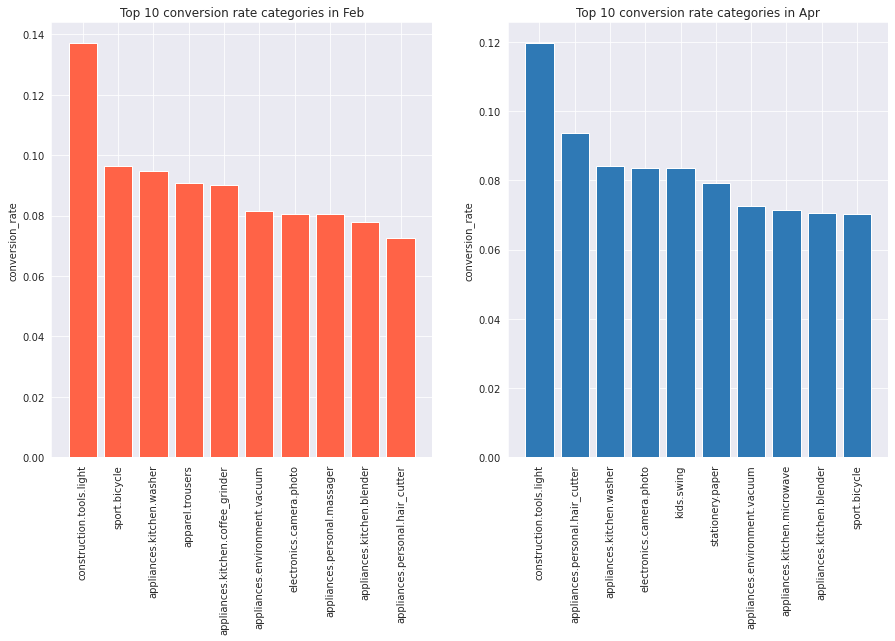

In [30]:
plt.gcf().set_size_inches(15, 8)

"""February"""
buy = feb['event_type']=='purchase'
purchase = feb.loc[buy].groupby('category_code').agg(num_cat=('category_code','count'), amount_pur=('price','sum')).reset_index()
total = feb.groupby('category_code').agg(num_session=('user_session',pd.Series.nunique)).reset_index()
conversion = purchase.merge(total)
conversion['conversion'] = conversion['num_cat'] / conversion['num_session']
top_con = conversion.sort_values('conversion', ascending = False).head(10)
tail_con = conversion.sort_values('conversion', ascending = False).tail(10)

plt.subplot(1,2,1)
plt.bar(top_con['category_code'],top_con['conversion'], color='tomato')
plt.xticks(rotation=90)
plt.title('Top 10 conversion rate categories in Feb')
plt.ylabel('conversion_rate')

"""April"""
buy4 = apr['event_type']=='purchase'
purchase4 = apr.loc[buy4].groupby('category_code').agg(num_cat=('category_code','count'), amount_pur=('price','sum')).reset_index()
total4 = apr.groupby('category_code').agg(num_session=('user_session',pd.Series.nunique)).reset_index()
conversion4 = purchase4.merge(total4)
conversion4['conversion_rate'] = conversion4['num_cat'] / conversion4['num_session']
top_con4 = conversion4.sort_values('conversion_rate', ascending = False).head(10)
tail_con4 = conversion4.sort_values('conversion_rate', ascending = False).tail(10)

plt.subplot(1,2,2)
plt.bar(top_con4['category_code'],top_con4['conversion_rate'])
plt.xticks(rotation=90)
plt.title('Top 10 conversion rate categories in Apr')
plt.ylabel('conversion_rate')

### Low conversion rate

Text(0, 0.5, 'conversion_rate')

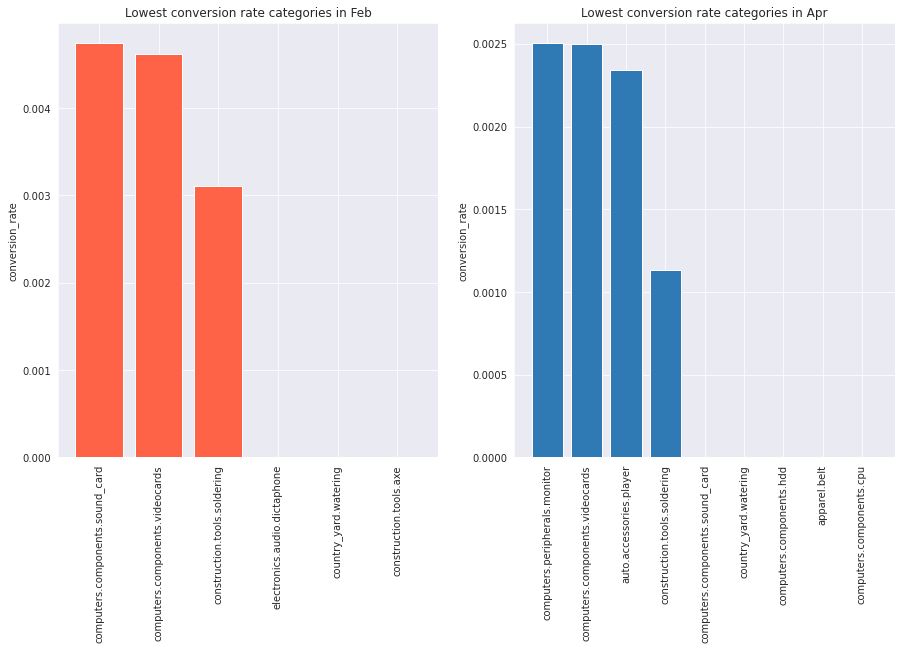

In [33]:
plt.gcf().set_size_inches(15, 8)
"""February"""
plt.subplot(1,2,1)
plt.bar(tail_con['category_code'],tail_con['conversion'], color='tomato')
plt.xticks(rotation=90)
plt.title('Lowest conversion rate categories in Feb')
plt.ylabel('conversion_rate')
"""April"""
plt.subplot(1,2,2)
plt.bar(tail_con4['category_code'],tail_con4['conversion_rate'])
plt.xticks(rotation=90)
plt.title('Lowest conversion rate categories in Apr')
plt.ylabel('conversion_rate');

### **Daily Sales**

We assume that for the month of April, the reason why 15th and 30th have the highest pick is related with the payment. There is a possibility that people in the Middle East are getting pay every 2 weeks or at the end of the month, which cause an increase on both days. Also, general trends of daily revenues grown up in April. While for the month of February, notice that the website has the highest number of visitors on Valentine's Day (Feb 14, 2020), which indicates that on holidays they tend to spend money few days before to buy presents to their beloved ones and descrease afterwards.

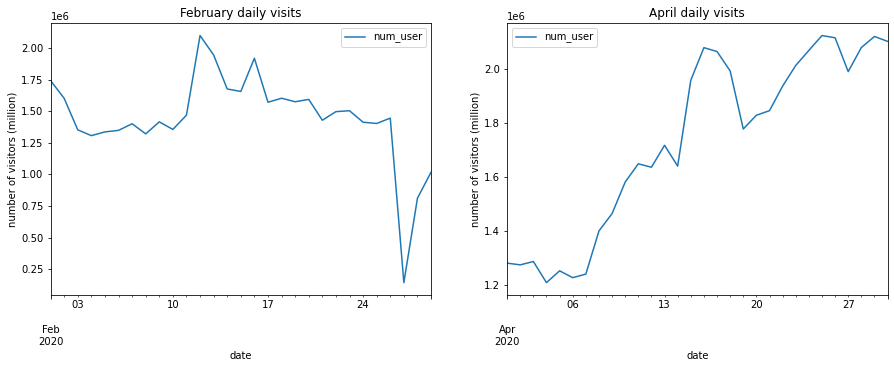

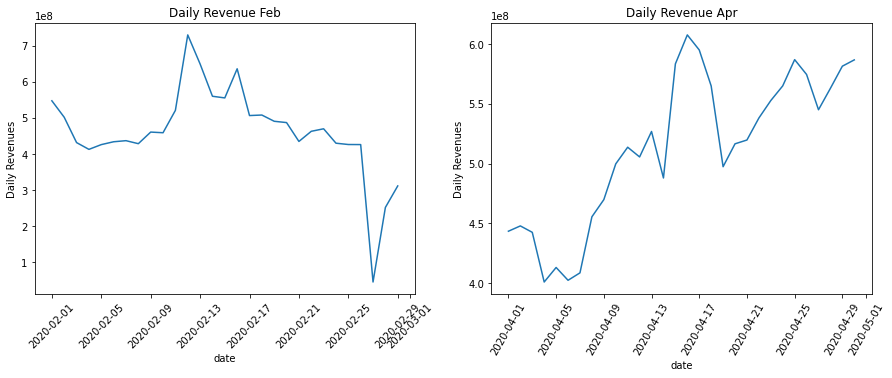

In [8]:
'''daily visits'''
daily = feb.groupby(feb['event_time']).agg(num_user=('user_id',lambda x: x.nunique()))
day = daily.resample('D').sum()
daily4 = apr.groupby(apr['event_time']).agg(num_user=('user_id',lambda x: x.nunique()))
day4 = daily4.resample('D').sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax0=day.reset_index().plot(kind='line',x='event_time',ax=ax[0],xlabel='date',ylabel='number of visitors (million)',title='February daily visits')
ax1=day4.reset_index().plot(kind='line',x='event_time',ax=ax[1],xlabel='date',ylabel='number of visitors (million)',title='April daily visits')

'''daily revenues '''
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
tmp_feb = feb.set_index('event_time').resample('D')['price'].sum().to_frame().reset_index()
ax0=sns.lineplot(x='event_time',y='price',data=tmp_feb,ax=ax[0])
ax0.set(title='Daily Revenue Feb',xlabel='date',ylabel='Daily Revenues')
label1 = ax0.get_xticklabels()
plt.setp(label1,rotation=60)

tmp = apr.set_index('event_time').resample('D')['price'].sum().to_frame().reset_index()
ax1=sns.lineplot(x='event_time',y='price',data=tmp,ax=ax[1])
ax1=plt.xticks(rotation=60)
ax1=plt.title('Daily Revenue Apr')
ax1=plt.ylabel('Daily Revenues')
ax1=plt.xlabel('date');


### **What's the hour with the larger number of purchases? In other words, what's the time that customer buys the most?**

**Result:** The time that customer make a purchase from the website is between 7am to 9am.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


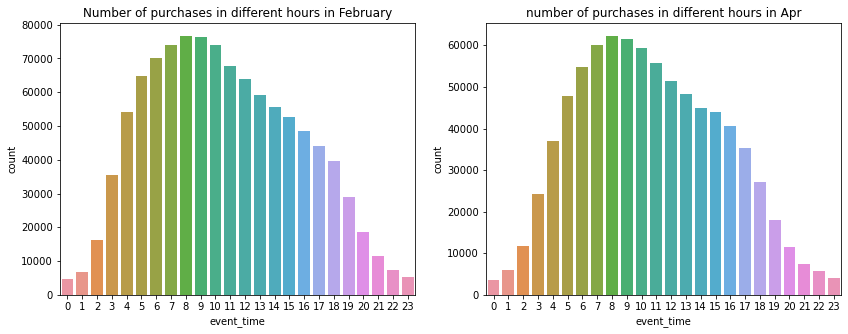

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

"""February"""
purchase_feb['event_time']=pd.to_datetime(purchase_feb['event_time'])
num_of_purchase_hourly_feb=purchase_feb.groupby(purchase_feb['event_time'].dt.hour).size()
ax0=sns.countplot(x=purchase_feb['event_time'].dt.hour, data=purchase_feb,ax=ax[0]).set_title('Number of purchases in different hours in February')

"""April"""
avg_spending_apr=apr['price'].mean()
purchase_apr['event_time']=pd.to_datetime(purchase_apr['event_time'])
num_of_purchase_hourly_apr=purchase_apr.groupby(purchase_apr['event_time'].dt.hour).size()
ax1=sns.countplot(x=purchase_apr['event_time'].dt.hour, data=purchase_apr,ax=ax[1]).set_title('number of purchases in different hours in Apr')

Follow up by the preview graph, we wanted to take a look this research deeper by using `resample` to check the average spendings per hour. Although we saw that people made more number of purchases in the morning, here we could observe that people were more willing to spend more money at night which consintent with february findings.




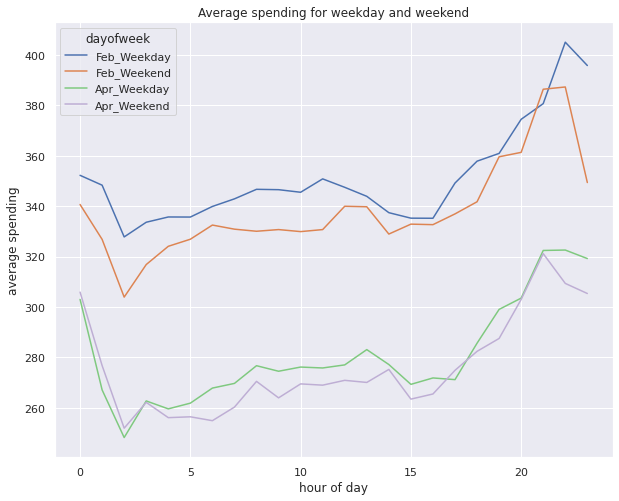

In [21]:
weekend_feb = np.where(purchase.index.weekday < 5, 'Feb_Weekday', 'Feb_Weekend')
by_time = purchase.groupby([weekend_feb, purchase.index.hour])[['price']].mean().reset_index()
by_time['dayofweek_feb'] =by_time['level_0']
by_time.drop('level_0',axis=1,inplace=True)

weekend_apr = np.where(purchase_apr.index.weekday < 5, 'Apr_Weekday', 'Apr_Weekend')
by_time_apr = purchase_apr.groupby([weekend_apr, purchase_apr.index.hour])[['price']].mean().reset_index()
by_time_apr['dayofweek'] =by_time_apr['level_0']
by_time_apr.drop('level_0',axis=1,inplace=True)

sns.lineplot(x='event_time',y='price',hue='dayofweek_feb',data=by_time).set(title='Average spending for weekday and weekend',xlabel='hour of day',ylabel='average spending');
sns.lineplot(x='event_time',y='price',hue='dayofweek',data=by_time_apr,palette='Accent');


It consists with february findings and has nearly identical distribution. However, When we take a closer look at the peak, we could notice that density is higher in low price range comparing to february findings. The reason causes this change might be during the pandemic and economic depression, people tend to purchases items in lower price.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


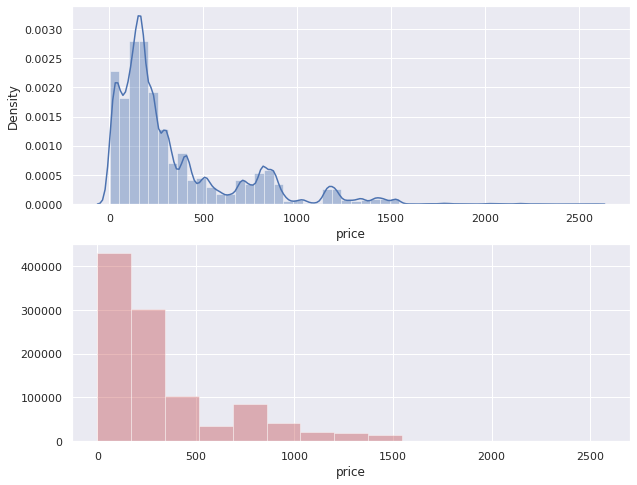

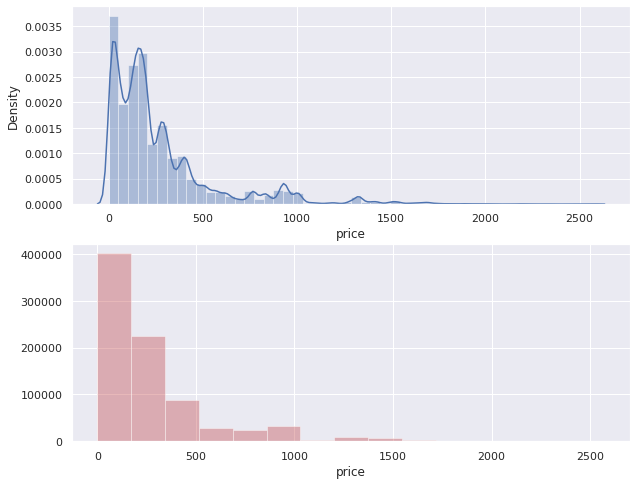

In [25]:
"""February"""
fig, ax = plt.subplots(2,1)
sns.distplot(purchase['price'], ax=ax[0])
sns.distplot(purchase['price'], kde=False, bins=15, color='r', ax=ax[1]);
"""April"""
fig, ax = plt.subplots(2,1)
sns.distplot(purchase_apr['price'], ax=ax[0])
sns.distplot(purchase_apr['price'], kde=False, bins=15, color='r', ax=ax[1]);

### **Abandon Rate**

The abandon rate is the percentage of tasks that are abandoned by the customer before completing the intended task. The abandon rate can be used as the metric to evaluate the purchase power of the users. The abandon rate of a certain user is:  \begin{equation*} Abandon \ rate  =  1-\frac{Number \ of \  'purchase' \ event}{Number \ of \ 'cart' \ event} \end{equation*} Only the user info with high abandon rate(#>0.9) is included and have the potential to work on increasing sales conversion, such as sending target promotions, poping promotional codes, running market campaigns, etc. 

In [9]:
"""February"""
cart = feb[feb['event_type'] == 'cart']
cart_count = pd.DataFrame(cart.groupby(['user_id']).size())
cart_count.columns = ['cart_count']
purchase = feb[feb['event_type'] == 'purchase']
purchase_count = pd.DataFrame(purchase.groupby(['user_id']).size())
purchase_count.columns = ['purchase_count']
cart_purchase = cart_count.join(purchase_count)
cart_purchase = cart_purchase.fillna(0)
cart_purchase['purchase_count'] = cart_purchase['purchase_count'].astype('int64')
cart_purchase['abandon_rate'] = 1-(cart_purchase['purchase_count']/cart_purchase['cart_count'])
print(cart_purchase[(cart_purchase['abandon_rate'] >= 0.9)& (cart_purchase['cart_count'] > 5)].sort_values('purchase_count', ascending=False))

"""April"""
cart4 = apr[apr['event_type'] == 'cart']
cart_count4 = pd.DataFrame(cart4.groupby(['user_id']).size())
cart_count4.columns = ['cart_count']
purchase_count4 = pd.DataFrame(purchase.groupby(['user_id']).size())
purchase_count4.columns = ['purchase_count']
cart_purchase4 = cart_count4.join(purchase_count4)
cart_purchase4 = cart_purchase4.fillna(0)
cart_purchase4['purchase_count'] = cart_purchase4['purchase_count'].astype('int64')
cart_purchase4['abandon_rate'] = 1-(cart_purchase4['purchase_count']/cart_purchase4['cart_count'])
print(cart_purchase4[(cart_purchase4['abandon_rate'] >= 0.9) & (cart_purchase4['cart_count'] > 5)].sort_values('purchase_count', ascending=False))

           cart_count  purchase_count  abandon_rate
user_id                                            
602004757         208              20      0.903846
599230284         430              19      0.955814
513886874         163              15      0.907975
544879268         153              13      0.915033
612418548         182              12      0.934066
...               ...             ...           ...
520215647           8               0      1.000000
520214844           9               0      1.000000
520212553           6               0      1.000000
520211705           7               0      1.000000
613194454           6               0      1.000000

[36654 rows x 3 columns]
           cart_count  purchase_count  abandon_rate
user_id                                            
603865034         287              23      0.919861
526643365         235              15      0.936170
577002177         168              13      0.922619
608185516         168              13 

### **LogisticRegression & Xgboost Model**

We would like to predict at time of addition to shopping cart, whether the user will purchase the product or not. First,in order to fit the model, we restructured the data to only include 'cart' and 'purchase' types of data and removed all of the NA values. We also added five new features to the dataset: 
- category_code_level1: category
- category_code_level2: sub-category
- event_weekday: weekday of the event
- activity_count: number of activity in that session
- is_purchased: whether the put in cart item is purchased

New dataset is saved to the csv file called 'training_data.csv'. We are going to use this new dataset to fit in the logistic regression model and the xgboost model. 

In [6]:
# code for restructing data
# apr['event_time']=pd.to_datetime(apr['event_time'])
# apr['event_type']=apr['event_type'].astype('category')
# apr['category_code']=apr['category_code'].astype('category')
# apr.drop(columns=['category_id'],inplace=True)
# apr.dropna(subset=['category_code','brand','user_session'],inplace=True)

# df = apr.copy()
# df_targets = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
# df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
# df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
# df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
# df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: str(dt.datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))
# df_targets.dropna(how='any', inplace=True)
# df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
# df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')

# cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
# cart_purchase_users.dropna(how='any', inplace=True)
# cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]
# activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
# activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})
# df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
# df_targets['activity_count'] = df_targets['activity_count'].fillna(0)

# df_targets.to_csv('training_data.csv')

In [10]:
!pip install xgboost
import pandas as pd
df_targets = pd.read_csv('training_data.csv')
df_targets.head()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,0,2020-04-01 00:00:19+00:00,cart,5100328,electronics.clocks,xiaomi,117.12,635164513,c40d1b96-90aa-4cee-b9aa-9475d9c4f17f,0,2,electronics,clocks,12
1,1,2020-04-01 00:00:23+00:00,cart,100177859,construction.tools.drill,s.oliver,60.49,633281427,667a8535-221c-4169-aab4-a1972610f102,1,2,construction,tools,9
2,2,2020-04-01 00:00:35+00:00,cart,1801503,appliances.personal.massager,xiaomi,203.09,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,1,2,appliances,personal,10
3,3,2020-04-01 00:00:42+00:00,cart,100011103,electronics.audio.headphone,acer,385.57,522177285,902aa3e5-957a-49e4-8638-ddbbe895808a,0,2,electronics,audio,4
4,4,2020-04-01 00:00:51+00:00,cart,7600480,furniture.kitchen.table,tp-link,52.77,512411694,7685a5aa-42ce-4bd3-b3f4-7d6e1b014ea5,0,2,furniture,kitchen,4


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
print("Shape of purchase is: {}".format(is_purcahase_set.shape[0]))
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
print("Shape of not purchase is: {}".format(not_purcahase_set.shape[0]))

Shape of purchase is: 733714
Shape of not purchase is: 989191


In [15]:
n_samples = 700000
is_purchase_downsampled = resample(is_purcahase_set, replace = False, n_samples = n_samples, random_state = 27)
not_purcahase_set_downsampled = resample(not_purcahase_set, replace = False, n_samples = n_samples, random_state = 27)
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()
features = downsampled.loc[:,['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count
1483494,2124,301.81,0,5,50,4
383998,1934,47.72,3,2,27,15
1454097,2124,168.06,6,5,50,10
1444472,631,34.49,6,1,26,19
390778,1117,504.26,3,7,1,8


In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, is_purchased, test_size = 0.3, random_state = 0)
                                                    
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)
y_model = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.5389666666666667

In [19]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.6122809523809524
Precision: 0.5875757836752883
Recall: 0.7485533000977983
fbeta: 0.611805319623322


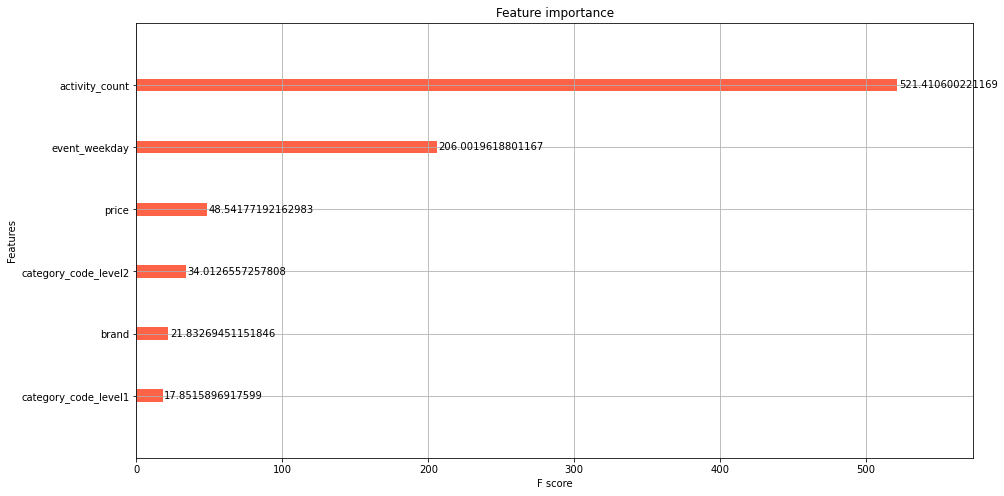

In [27]:
import xgboost as xgb
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=10, importance_type ='gain', color='tomato')
plt.gcf().set_size_inches(15, 8)
plt.show()

> First, we used the logistic regression model to predict whether the user will purchase a certain item after putting into the shopping cart. The model accuracy is 0.54, which is bit of low. Thus, we switched to the Xgboost model to see if the accuracy could be imporoved. It turns out that the accuracy imporves by almost 10% compared to the old model. According to the precision of 0.6 and recall score of 0.7, we know that when predicting if the user will purchase the new added item, this model is correct 60% of the time; also it correctly identifies 70% of the purchase. 

# **Conclusion**

---

As the world is changing to manage COVID-19 pandemic, cosumers also changed their behavioral consumption in several ways. First, a higher number of users started to move to omnichannel as an alternative to brick and mortar stores since the new consumer span all areas of life from how they manage to work from home to how they manage to consume products. Second, post-covid consumers shifted their spendings more likely to essentials, such as household machines, hair cuts supplies and kitchen appliances. Third, unemployment was a factor to become more mindful of their expenses, since they expect COVID last couple more months. 




# Solutions


---


*   Something can CMO can do is to focus on building relationship with customers, due to the pandemic sales had decrease, however, it is the point of the time where e-commerce webpages get to the highest visits rates. So taking the advantage that people has more time at home to check the webpage, we must build 'trusting relationship'. Creating a brand connection B2C (Business to Customers) that delivers purchases for the company in the future.
*   Products with low conversion rate are more likely to create a ghost page, a potential solution is to make a clearance sale and eventually drop the product line without stocking it in future. This will provide more storage and availability for products with higher conversion rate.
*   Check the content, keywords strategies that will potentially drive more traffic to the webpage, and easy to find through the search engine.




---

